In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('combined_data.csv')
df.head()

,sentiment,Text
0,sadness,@tiffanylue i know i was listenin to bad habi...
1,sadness,Layin n bed with a headache ughhhh...waitin o...
2,sadness,Funeral ceremony...gloomy friday...
3,happy,wants to hang out with friends SOON!
4,neutral,@dannycastillo We want to trade with someone w...


In [3]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re

stopWords = stopwords.words("english")

def cleanText(text):
    
    output = ""
    
    
    for word in text.split():
        cleanWord = re.sub("[^a-zA-Z]",  # Search for all non-letters
                          " ",          # Replace all non-letters with spaces
                          str(word))
        if cleanWord in stopWords:
            pass
        else:
            output = output + " " + cleanWord
    return output

In [4]:
df.Text = df.Text.apply(lambda x: cleanText(x))

In [5]:
import re
df['Text'] = df['Text'].apply(lambda x: re.sub("(@[A-Za-z0-9]+)|([^A-Za-z \t])|(\w+:\/\/\S+)",'',x))
df.dropna(inplace=True)

In [6]:
import snowballstemmer
ss = snowballstemmer.stemmer('english')
def replace(x):
    words = x.split()
    newtext = ''
    for w in words:
        n = ss.stemWord(w)
        newtext += n
        newtext += " "
    return newtext
df['Text'] = df['Text'].apply(lambda x: replace(x))
df.head()

,sentiment,Text
0,sadness,tiffanylu know listenin bad habit earlier star...
1,sadness,Layin n bed headach ughhhh waitin call
2,sadness,Funer ceremoni gloomi friday
3,happy,want hang friend SOON
4,neutral,dannycastillo We want trade someon Houston tic...


In [7]:
def stratify(data, N):
    rows = []
    fear = data[data['sentiment'] == 'fear']
    happy = data[data['sentiment'] == 'happy']
    sad = data[data['sentiment'] == 'sadness']
    neutral = data[data['sentiment'] == 'neutral']
    love = data[data['sentiment'] == 'love']
    anger = data[data['sentiment'] == 'anger']
    surprise = data[data['sentiment'] == 'surprise']
    relief = data[data['sentiment'] == 'relief']
    
    for i in range(N):
        #print(fear.loc[np.random.choice(fear.index)])
        rows.append(fear.loc[np.random.choice(fear.index)])
        rows.append(happy.loc[np.random.choice(happy.index)])
        rows.append(sad.loc[np.random.choice(sad.index)])
        rows.append(neutral.loc[np.random.choice(neutral.index)])
        rows.append(love.loc[np.random.choice(love.index)])
        rows.append(anger.loc[np.random.choice(anger.index)])
        rows.append(surprise.loc[np.random.choice(surprise.index)])
        rows.append(relief.loc[np.random.choice(relief.index)])
    sentiments = [x['sentiment'] for x in rows]
    texts = [x['Text'] for x in rows]
    d = {'sentiment': sentiments, 'Text': texts}
    return pd.DataFrame(d)

In [8]:
balanced_df = stratify(df, 10000)
balanced_df['sentiment'].value_counts()

neutral     10000
surprise    10000
relief      10000
sadness     10000
happy       10000
anger       10000
fear        10000
love        10000
Name: sentiment, dtype: int64

In [9]:
unbalanced = pd.read_csv('combined_data.csv')
unbalanced.head()

,sentiment,Text
0,sadness,@tiffanylue i know i was listenin to bad habi...
1,sadness,Layin n bed with a headache ughhhh...waitin o...
2,sadness,Funeral ceremony...gloomy friday...
3,happy,wants to hang out with friends SOON!
4,neutral,@dannycastillo We want to trade with someone w...


In [10]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re

stopWords = stopwords.words("english")

def cleanText(text):
    
    output = ""
    
    
    for word in text.split():
        cleanWord = re.sub("[^a-zA-Z]",  # Search for all non-letters
                          " ",          # Replace all non-letters with spaces
                          str(word))
        if cleanWord in stopWords:
            pass
        else:
            output = output + " " + cleanWord
    return output

In [11]:
unbalanced.Text = unbalanced.Text.apply(lambda x: cleanText(x))

In [12]:
import re
unbalanced['Text'] = unbalanced['Text'].apply(lambda x: re.sub("(@[A-Za-z0-9]+)|([^A-Za-z \t])|(\w+:\/\/\S+)",'',x))
unbalanced.dropna(inplace=True)

In [13]:
import snowballstemmer
ss = snowballstemmer.stemmer('english')
def replace(x):
    words = x.split()
    newtext = ''
    for w in words:
        n = ss.stemWord(w)
        newtext += n
        newtext += " "
    return newtext
unbalanced['Text'] = unbalanced['Text'].apply(lambda x: replace(x))
unbalanced.head()

,sentiment,Text
0,sadness,tiffanylu know listenin bad habit earlier star...
1,sadness,Layin n bed headach ughhhh waitin call
2,sadness,Funer ceremoni gloomi friday
3,happy,want hang friend SOON
4,neutral,dannycastillo We want trade someon Houston tic...


In [14]:
unbalanced['sentiment'].value_counts()

fear        16241
happy       13508
sadness      9796
neutral      8960
love         4720
anger        4069
surprise     2639
relief       1526
Name: sentiment, dtype: int64

In [113]:
from sklearn.model_selection import train_test_split

#overall train and test
X_train, X_test = train_test_split(df, test_size=0.2, random_state=42)

In [114]:
#fear df
fearDf = df[df['sentiment'] == 'fear']

#happy df 
happyDf = df[df['sentiment'] == 'happy']


#sadness df
sadDf = df[df['sentiment'] == 'sadness']


#anger df
angerDf = df[df['sentiment'] == 'anger']


In [115]:
from sklearn import svm
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier

clf = svm.SVC(kernel='linear')

In [8]:
happyVsRest = pd.read_csv('combined_data.csv')

happyVsRest['sentiment'] = np.where((happyVsRest.sentiment != 'happy'),'not happy', happyVsRest.sentiment)

happyVsRest.head()

,sentiment,Text
0,not happy,@tiffanylue i know i was listenin to bad habi...
1,not happy,Layin n bed with a headache ughhhh...waitin o...
2,not happy,Funeral ceremony...gloomy friday...
3,happy,wants to hang out with friends SOON!
4,not happy,@dannycastillo We want to trade with someone w...


In [9]:
for i,s in enumerate(happyVsRest['sentiment']):
    if s == 'not happy':
        happyVsRest.loc[i,'sentiment'] = '0'
    if s == 'happy':
        happyVsRest.loc[i,'sentiment'] = '1'

In [10]:
#Non Happy vs Happy df
import time
hnh_train, hnh_test = train_test_split(happyVsRest, test_size=0.2, random_state=42)

vectorizer = TfidfVectorizer(min_df = 5,
                             max_df = 0.8,
                             sublinear_tf = True,
                             use_idf = True)
train_vectors = vectorizer.fit_transform(hnh_train['Text'])
test_vectors = vectorizer.transform(hnh_test['Text'])

# Perform classification with SVM, kernel=linear
classifier_linear = svm.SVC(kernel='linear', probability = True)
t0 = time.time()
classifier_linear.fit(train_vectors, hnh_train['sentiment'])
t1 = time.time()
prediction_linear = classifier_linear.predict(test_vectors)
t2 = time.time()
time_linear_train = t1-t0
time_linear_predict = t2-t1

# results
print("Training time: %fs; Prediction time: %fs" % (time_linear_train, time_linear_predict))
report = classification_report(hnh_test['sentiment'], prediction_linear, output_dict=True)
print('not happy: ', report['0'])
print('happy: ', report['1'])

Training time: 1835.984945s; Prediction time: 35.943700s
not happy:  {'precision': 0.7950749829584185, 'recall': 0.9780922431865828, 'f1-score': 0.8771385598796766, 'support': 9540}
happy:  {'precision': 0.6241007194244604, 'recall': 0.12609011627906977, 'f1-score': 0.2097944377267231, 'support': 2752}


In [11]:
#skew
happyVsRest['sentiment'].value_counts()

0    47951
1    13508
Name: sentiment, dtype: int64

In [12]:
hnh_train['sentiment'].value_counts()

0    38411
1    10756
Name: sentiment, dtype: int64

In [13]:
hnh_test['sentiment'].value_counts()

0    9540
1    2752
Name: sentiment, dtype: int64

In [99]:
#import numpy as np

classifier_linear.predict(test_vectors)

result = np.where(arr == 1)
print(result)

(array([], dtype=int64),)


In [102]:
arr = classifier_linear.predict(test_vectors)

x = np.where(arr == '1')
print(x)
#'1' in arr

(array([    8,    13,    59,    90,   136,   192,   193,   212,   234,
         239,   248,   251,   268,   289,   350,   358,   365,   425,
         442,   504,   509,   560,   576,   583,   648,   684,   700,
         733,   799,   843,   927,   946,  1027,  1056,  1086,  1169,
        1176,  1197,  1202,  1226,  1300,  1302,  1303,  1340,  1365,
        1418,  1435,  1442,  1445,  1449,  1497,  1502,  1584,  1650,
        1703,  1723,  1729,  1757,  1821,  1851,  1976,  2008,  2059,
        2064,  2095,  2154,  2240,  2249,  2264,  2308,  2333,  2432,
        2450,  2478,  2562,  2650,  2768,  2802,  2834,  2844,  2878,
        2926,  2928,  2944,  2961,  3034,  3046,  3109,  3280,  3286,
        3317,  3338,  3432,  3439,  3523,  3615,  3632,  3748,  3759,
        3788,  3822,  3825,  3839,  3982,  4003,  4026,  4037,  4116,
        4123,  4173,  4207,  4223,  4356,  4516,  4592,  4615,  4666,
        4671,  4686,  4722,  4737,  4794,  4826,  4854,  4875,  4882,
        4908,  4935

In [15]:
classifier_linear.predict_proba(test_vectors)

array([[0.82856456, 0.17143544],
       [0.80560594, 0.19439406],
       [0.88822456, 0.11177544],
       ...,
       [0.88360942, 0.11639058],
       [0.83371015, 0.16628985],
       [0.80368258, 0.19631742]])

In [116]:
fearVsRest = pd.read_csv('combined_data.csv')

fearVsRest['sentiment'] = np.where((fearVsRest.sentiment != 'fear'),'not fear', fearVsRest.sentiment)

fearVsRest.head()

,sentiment,Text
0,not fear,@tiffanylue i know i was listenin to bad habi...
1,not fear,Layin n bed with a headache ughhhh...waitin o...
2,not fear,Funeral ceremony...gloomy friday...
3,not fear,wants to hang out with friends SOON!
4,not fear,@dannycastillo We want to trade with someone w...


In [117]:
for i,s in enumerate(fearVsRest['sentiment']):
    if s == 'not fear':
        fearVsRest.loc[i,'sentiment'] = '0'
    if s == 'fear':
        fearVsRest.loc[i,'sentiment'] = '1'

In [118]:
#Non Fear vs Fear df
import time
fnf_train, fnf_test = train_test_split(fearVsRest, test_size=0.2, random_state=42)

vectorizer = TfidfVectorizer(min_df = 5,
                             max_df = 0.8,
                             sublinear_tf = True,
                             use_idf = True)
train_vectors = vectorizer.fit_transform(fnf_train['Text'])
test_vectors = vectorizer.transform(fnf_test['Text'])

# Perform classification with SVM, kernel=linear
classifier_linear = svm.SVC(kernel='linear')
t0 = time.time()
classifier_linear.fit(train_vectors, fnf_train['sentiment'])
t1 = time.time()
prediction_linear = classifier_linear.predict(test_vectors)
t2 = time.time()
time_linear_train = t1-t0
time_linear_predict = t2-t1

# results
print("Training time: %fs; Prediction time: %fs" % (time_linear_train, time_linear_predict))
report = classification_report(fnf_test['sentiment'], prediction_linear, output_dict=True)
print('not fear: ', report['0'])
print('fear: ', report['1'])

KeyboardInterrupt: 

In [19]:
#skew
fearVsRest['sentiment'].value_counts()

0    45218
1    16241
Name: sentiment, dtype: int64

In [20]:
#skew
fnf_train['sentiment'].value_counts()

0    36196
1    12971
Name: sentiment, dtype: int64

In [21]:
#skew
fnf_test['sentiment'].value_counts()

0    9022
1    3270
Name: sentiment, dtype: int64

In [22]:
classifier_linear.predict(test_vectors)

array(['0', '0', '0', ..., '0', '0', '0'], dtype=object)

In [97]:
arr = classifier_linear.predict(test_vectors)

'1' in arr

True

In [23]:
classifier_linear.predict_proba(test_vectors)

array([[0.75428952, 0.24571048],
       [0.76354219, 0.23645781],
       [0.73119597, 0.26880403],
       ...,
       [0.75522863, 0.24477137],
       [0.73453884, 0.26546116],
       [0.79897007, 0.20102993]])

In [30]:
sadVsRest = pd.read_csv('combined_data.csv')

sadVsRest['sentiment'] = np.where((sadVsRest.sentiment != 'sadness'),'not sadness', sadVsRest.sentiment)

sadVsRest.head()

,sentiment,Text
0,sadness,@tiffanylue i know i was listenin to bad habi...
1,sadness,Layin n bed with a headache ughhhh...waitin o...
2,sadness,Funeral ceremony...gloomy friday...
3,not sadness,wants to hang out with friends SOON!
4,not sadness,@dannycastillo We want to trade with someone w...


In [33]:
for i,s in enumerate(sadVsRest['sentiment']):
    if s == 'not sadness':
        sadVsRest.loc[i,'sentiment'] = '0'
    if s == 'sadness':
        sadVsRest.loc[i,'sentiment'] = '1'

In [37]:
#Non Sadness vs Sadness df
sns_train, sns_test = train_test_split(sadVsRest, test_size=0.2, random_state=42)

vectorizer = TfidfVectorizer(min_df = 5,
                             max_df = 0.8,
                             sublinear_tf = True,
                             use_idf = True)
train_vectors = vectorizer.fit_transform(sns_train['Text'])
test_vectors = vectorizer.transform(sns_test['Text'])

# Perform classification with SVM, kernel=linear
classifier_linear = svm.SVC(kernel='linear', probability = True)
t0 = time.time()
classifier_linear.fit(train_vectors, sns_train['sentiment'])
t1 = time.time()
prediction_linear = classifier_linear.predict(test_vectors)
t2 = time.time()
time_linear_train = t1-t0
time_linear_predict = t2-t1

# results
print("Training time: %fs; Prediction time: %fs" % (time_linear_train, time_linear_predict))
report = classification_report(sns_test['sentiment'], prediction_linear, output_dict=True)
print('not sadness: ', report['0'])
print('sadness: ', report['1'])

Training time: 2042.213552s; Prediction time: 25.836786s
not sadness:  {'precision': 0.8498290669557241, 'recall': 0.9852102464958917, 'f1-score': 0.9125257408899633, 'support': 10345}
sadness:  {'precision': 0.4882943143812709, 'recall': 0.07498715973292244, 'f1-score': 0.13000890471950133, 'support': 1947}


In [38]:
sadVsRest['sentiment'].value_counts()

0    51663
1     9796
Name: sentiment, dtype: int64

In [39]:
sns_train['sentiment'].value_counts()

0    41318
1     7849
Name: sentiment, dtype: int64

In [40]:
sns_test['sentiment'].value_counts()

0    10345
1     1947
Name: sentiment, dtype: int64

In [41]:
classifier_linear.predict(test_vectors)

array(['0', '0', '0', ..., '0', '0', '0'], dtype=object)

In [42]:
classifier_linear.predict_proba(test_vectors)

array([[0.48290831, 0.51709169],
       [0.84903321, 0.15096679],
       [0.87472023, 0.12527977],
       ...,
       [0.83823718, 0.16176282],
       [0.90115009, 0.09884991],
       [0.89518101, 0.10481899]])

In [31]:
angerVsRest = pd.read_csv('combined_data.csv')

angerVsRest['sentiment'] = np.where((angerVsRest.sentiment != 'anger'),'not anger', angerVsRest.sentiment)

angerVsRest.head()

,sentiment,Text
0,not anger,@tiffanylue i know i was listenin to bad habi...
1,not anger,Layin n bed with a headache ughhhh...waitin o...
2,not anger,Funeral ceremony...gloomy friday...
3,not anger,wants to hang out with friends SOON!
4,not anger,@dannycastillo We want to trade with someone w...


In [32]:
for i,s in enumerate(angerVsRest['sentiment']):
    if s == 'not anger':
        angerVsRest.loc[i,'sentiment'] = '0'
    if s == 'anger':
        angerVsRest.loc[i,'sentiment'] = '1'

In [ ]:
ana_train, ana_test = train_test_split(angerVsRest, test_size=0.2, random_state=42)

vectorizer = TfidfVectorizer(min_df = 5,
                             max_df = 0.8,
                             sublinear_tf = True,
                             use_idf = True)
train_vectors = vectorizer.fit_transform(ana_train['Text'])
test_vectors = vectorizer.transform(ana_test['Text'])

# Perform classification with SVM, kernel=linear
classifier_linear = svm.SVC(kernel='linear', probability = True)
t0 = time.time()
classifier_linear.fit(train_vectors, ana_train['sentiment'])
t1 = time.time()
prediction_linear = classifier_linear.predict(test_vectors)
t2 = time.time()
time_linear_train = t1-t0
time_linear_predict = t2-t1

# results
print("Training time: %fs; Prediction time: %fs" % (time_linear_train, time_linear_predict))
report = classification_report(ana_test['sentiment'], prediction_linear, output_dict=True)

print('not anger: ', report['0'])
print('anger: ', report['1'])

In [ ]:
angerVsRest['sentiment'].value_counts()

In [ ]:
ana_train['sentiment'].value_counts()

In [ ]:
ana_test['sentiment'].value_counts()

In [ ]:
classifier_linear.predict(test_vectors)

In [ ]:
classifier_linear.predict_proba(test_vectors)

In [15]:
#Balanced
from sklearn.model_selection import train_test_split
import time
from sklearn import svm
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report
for i,s in enumerate(balanced_df['sentiment']):
    if s == 'happy':
        balanced_df.loc[i,'sentiment'] = '1'
    if s == 'fear':
        balanced_df.loc[i,'sentiment'] = '2'
    if s == 'sadness':
        balanced_df.loc[i,'sentiment'] = '3'
    if s == 'neutral':
        balanced_df.loc[i,'sentiment'] = '4'
    if s == 'love':
        balanced_df.loc[i,'sentiment'] = '5'
    if s == 'anger':
        balanced_df.loc[i,'sentiment'] = '6'
    if s == 'surprise':
        balanced_df.loc[i,'sentiment'] = '7'
    if s == 'relief':
        balanced_df.loc[i,'sentiment'] = '8'

#1.4.1.1. Multi-class classification
#SVC and NuSVC implement the “one-versus-one” approach for multi-class classification. 
#In total, n_classes * (n_classes - 1) / 2 classifiers are constructed and each one trains data from two classes. 
#To provide a consistent interface with other classifiers, the decision_function_shape option allows to 
#monotonically transform the results of the “one-versus-one” classifiers to a “one-vs-rest” decision 
#function of shape (n_samples, n_classes).

#We have 8 Classes ==> 8*(8-1)/2 = 28 classifiers.

balanced_train, balanced_test = train_test_split(balanced_df, test_size=0.2, random_state=42)

vectorizer = TfidfVectorizer(min_df = 5,
                             max_df = 0.8,
                             sublinear_tf = True,
                             use_idf = True)
train_vectors_ovo = vectorizer.fit_transform(balanced_train['Text'])
test_vectors_ovo = vectorizer.transform(balanced_test['Text'])

classifier_ovo = svm.SVC(decision_function_shape='ovo')
t0 = time.time()
classifier_ovo.fit(train_vectors_ovo, balanced_train['sentiment'])
t1 = time.time()
#svm.SVC(decision_function_shape='ovo')
prediction_ovo = classifier_ovo.predict(test_vectors_ovo)
t2 = time.time()
time_ovo_train = t1-t0
time_ovo_predict = t2-t1

print("Training time: %fs; Prediction time: %fs" % (time_ovo_train, time_ovo_predict))
report = classification_report(balanced_test['sentiment'], prediction_ovo, output_dict=True)
print('happy: ', report['1'])
print('fear: ', report['2'])
print('sadness: ', report['3'])
print('neutral: ', report['4'])
print('love: ', report['5'])
print('anger: ', report['6'])
print('surprise: ', report['7'])
print('relief: ', report['8'])


#dec = classifier_multi.decision_function([[1]])
#dec.shape[1] # 4 classes: 4*3/2 = 6

#clf.decision_function_shape = "ovr"
#dec = clf.decision_function([[1]])
#dec.shape[1] # 4 classes

Training time: 1262.548165s; Prediction time: 85.020762s
happy:  {'precision': 0.6520833333333333, 'recall': 0.6336032388663968, 'f1-score': 0.6427104722792608, 'support': 1976}
fear:  {'precision': 0.6503623188405797, 'recall': 0.5326409495548962, 'f1-score': 0.5856443719412724, 'support': 2022}
sadness:  {'precision': 0.6987468671679198, 'recall': 0.6816625916870416, 'f1-score': 0.6900990099009902, 'support': 2045}
neutral:  {'precision': 0.6195161951619517, 'recall': 0.7539920159680639, 'f1-score': 0.6801710555930679, 'support': 2004}
love:  {'precision': 0.8230472516875603, 'recall': 0.8505231689088192, 'f1-score': 0.836559666748346, 'support': 2007}
anger:  {'precision': 0.8757731958762887, 'recall': 0.8520561685055166, 'f1-score': 0.8637519064565329, 'support': 1994}
surprise:  {'precision': 0.8963941086846114, 'recall': 0.889616935483871, 'f1-score': 0.8929926637996458, 'support': 1984}
relief:  {'precision': 0.9466865969108121, 'recall': 0.9654471544715447, 'f1-score': 0.955974

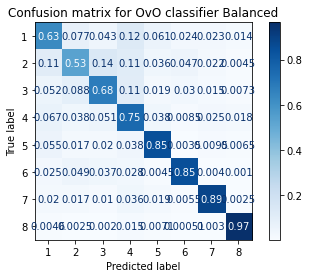

In [16]:
from sklearn.metrics import plot_confusion_matrix
from mlxtend.plotting import plot_decision_regions
matrix = plot_confusion_matrix(classifier_ovo, test_vectors_ovo, balanced_test['sentiment'],
                                 cmap=plt.cm.Blues,
                                 normalize='true')
plt.title('Confusion matrix for OvO classifier Balanced')
plt.show(matrix)
plt.show()

In [17]:
#Balanced Train and Unbalanced Test
for i,s in enumerate(unbalanced['sentiment']):
    if s == 'happy':
        unbalanced.loc[i,'sentiment'] = '1'
    if s == 'fear':
        unbalanced.loc[i,'sentiment'] = '2'
    if s == 'sadness':
        unbalanced.loc[i,'sentiment'] = '3'
    if s == 'neutral':
        unbalanced.loc[i,'sentiment'] = '4'
    if s == 'love':
        unbalanced.loc[i,'sentiment'] = '5'
    if s == 'anger':
        unbalanced.loc[i,'sentiment'] = '6'
    if s == 'surprise':
        unbalanced.loc[i,'sentiment'] = '7'
    if s == 'relief':
        unbalanced.loc[i,'sentiment'] = '8'
        
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
print(balanced_df.shape)
print(unbalanced.shape)
unbalanced_train, unbalanced_test = train_test_split(unbalanced, test_size=0.2, random_state=42)

vectorizer = TfidfVectorizer(min_df = 5,
                             max_df = 0.8,
                             sublinear_tf = True,
                             use_idf = True)
train_vectors_ovo = vectorizer.fit_transform(balanced_train['Text'])
test_vectors_ovo = vectorizer.transform(unbalanced_test['Text'])

classifier_ovo = svm.SVC(decision_function_shape='ovo')
t0 = time.time()
classifier_ovo.fit(train_vectors_ovo, balanced_train['sentiment'])
t1 = time.time()
#svm.SVC(decision_function_shape='ovo')
prediction_ovo = classifier_ovo.predict(test_vectors_ovo)
t2 = time.time()
time_ovo_train = t1-t0
time_ovo_predict = t2-t1

print("Training time: %fs; Prediction time: %fs" % (time_ovo_train, time_ovo_predict))
report = classification_report(unbalanced_test['sentiment'], prediction_ovo, output_dict=True)
print('happy: ', report['1'])
print('fear: ', report['2'])
print('sadness: ', report['3'])
print('neutral: ', report['4'])
print('love: ', report['5'])
print('anger: ', report['6'])
print('surprise: ', report['7'])
print('relief: ', report['8'])

(80000, 2)
(61459, 2)
Training time: 1122.444948s; Prediction time: 60.810163s
happy:  {'precision': 0.7248945147679325, 'recall': 0.6242732558139535, 'f1-score': 0.6708317063647014, 'support': 2752}
fear:  {'precision': 0.7570546737213404, 'recall': 0.5250764525993884, 'f1-score': 0.6200794510653667, 'support': 3270}
sadness:  {'precision': 0.6614785992217899, 'recall': 0.6985105290190036, 'f1-score': 0.67949038221334, 'support': 1947}
neutral:  {'precision': 0.5634753268663011, 'recall': 0.7599544937428896, 'f1-score': 0.6471300557035601, 'support': 1758}
love:  {'precision': 0.6809563066776587, 'recall': 0.8568464730290456, 'f1-score': 0.7588424437299035, 'support': 964}
anger:  {'precision': 0.698936170212766, 'recall': 0.8348157560355781, 'f1-score': 0.760856977417487, 'support': 787}
surprise:  {'precision': 0.6686567164179105, 'recall': 0.8853754940711462, 'f1-score': 0.761904761904762, 'support': 506}
relief:  {'precision': 0.7400990099009901, 'recall': 0.9707792207792207, 'f1-

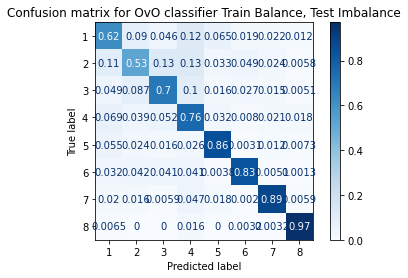

In [19]:
from sklearn.metrics import plot_confusion_matrix
from mlxtend.plotting import plot_decision_regions
matrix = plot_confusion_matrix(classifier_ovo, test_vectors_ovo, unbalanced_test['sentiment'],
                                 cmap=plt.cm.Blues,
                                 normalize='true')
plt.title('Confusion matrix for OvO classifier Train Balance, Test Imbalance')
plt.show(matrix)
plt.show()

In [20]:
#Imbalance Train and Balanced Test
        

vectorizer = TfidfVectorizer(min_df = 5,
                             max_df = 0.8,
                             sublinear_tf = True,
                             use_idf = True)
train_vectors_ovo = vectorizer.fit_transform(unbalanced_train['Text'])
test_vectors_ovo = vectorizer.transform(balanced_test['Text'])

classifier_ovo = svm.SVC(decision_function_shape='ovo')
t0 = time.time()
classifier_ovo.fit(train_vectors_ovo, unbalanced_train['sentiment'])
t1 = time.time()
#svm.SVC(decision_function_shape='ovo')
prediction_ovo = classifier_ovo.predict(test_vectors_ovo)
t2 = time.time()
time_ovo_train = t1-t0
time_ovo_predict = t2-t1

print("Training time: %fs; Prediction time: %fs" % (time_ovo_train, time_ovo_predict))
report = classification_report(balanced_test['sentiment'], prediction_ovo, output_dict=True)
print('happy: ', report['1'])
print('fear: ', report['2'])
print('sadness: ', report['3'])
print('neutral: ', report['4'])
print('love: ', report['5'])
print('anger: ', report['6'])
print('surprise: ', report['7'])
print('relief: ', report['8'])

Training time: 921.620650s; Prediction time: 67.994270s
happy:  {'precision': 0.4227685729556387, 'recall': 0.8006072874493927, 'f1-score': 0.5533403287862889, 'support': 1976}
fear:  {'precision': 0.3851713686173933, 'recall': 0.8170128585558852, 'f1-score': 0.5235303438440817, 'support': 2022}
sadness:  {'precision': 0.750281214848144, 'recall': 0.652322738386308, 'f1-score': 0.6978812450954748, 'support': 2045}
neutral:  {'precision': 0.49123904881101377, 'recall': 0.783433133732535, 'f1-score': 0.6038461538461538, 'support': 2004}
love:  {'precision': 0.7893536121673004, 'recall': 0.5171898355754858, 'f1-score': 0.6249247441300422, 'support': 2007}
anger:  {'precision': 0.9302325581395349, 'recall': 0.46138415245737213, 'f1-score': 0.6168286959436808, 'support': 1994}
surprise:  {'precision': 0.978448275862069, 'recall': 0.2288306451612903, 'f1-score': 0.3709150326797386, 'support': 1984}
relief:  {'precision': 0.9647577092511013, 'recall': 0.11128048780487805, 'f1-score': 0.199544

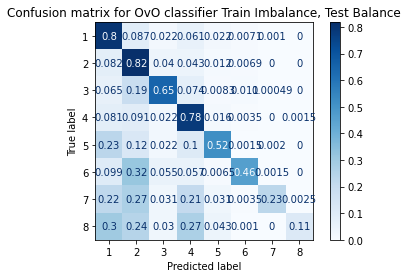

In [21]:
from sklearn.metrics import plot_confusion_matrix
from mlxtend.plotting import plot_decision_regions
matrix = plot_confusion_matrix(classifier_ovo, test_vectors_ovo, balanced_test['sentiment'],
                                 cmap=plt.cm.Blues,
                                 normalize='true')
plt.title('Confusion matrix for OvO classifier Train Imbalance, Test Balance')
plt.show(matrix)
plt.show()